<ipython-input-2-1c84e7ae12cc>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(issue_counts.keys()), y=list(issue_counts.values()), palette="coolwarm")


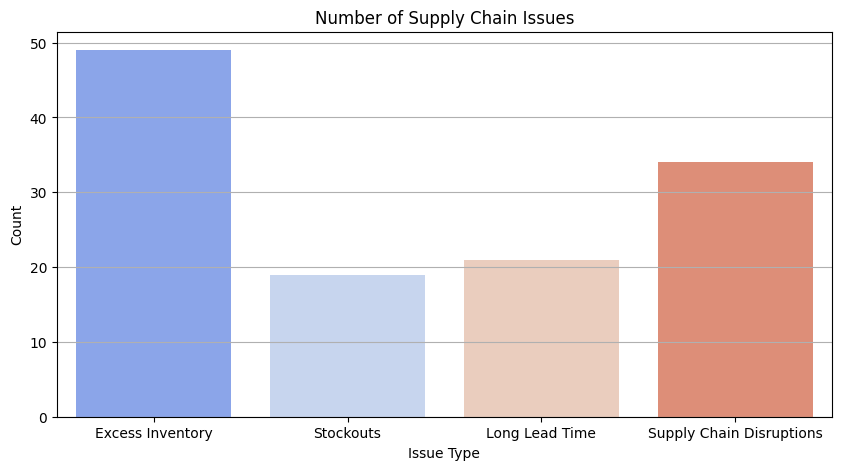

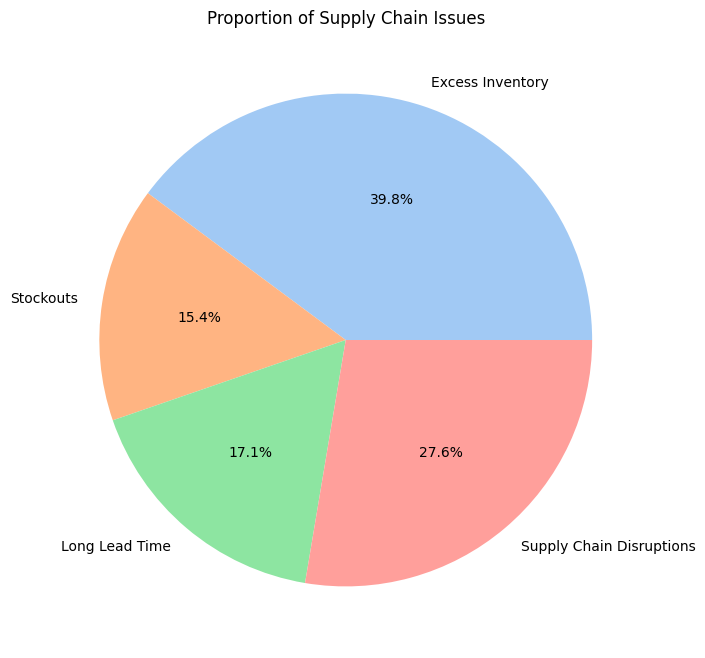

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_excel("/content/Detailed Excel File.xlsx", parse_dates=["Date"])

# Identify issues
df["Excess Inventory"] = df["Inventory Levels (units)"] > (1.5 * df["Demand Forecast (units)"])
df["Stockout"] = df["Inventory Levels (units)"] < (0.5 * df["Demand Forecast (units)"])
df["Long Lead Time"] = df["Supplier Lead Time (days)"] > 20
df["Supply Chain Disruptions"] = df["Stockout"] | df["Long Lead Time"]

# Count the number of occurrences for each issue
issue_counts = {
    "Excess Inventory": df["Excess Inventory"].sum(),
    "Stockouts": df["Stockout"].sum(),
    "Long Lead Time": df["Long Lead Time"].sum(),
    "Supply Chain Disruptions": df["Supply Chain Disruptions"].sum()
}

# Bar chart: Number of each issue type
plt.figure(figsize=(10, 5))
sns.barplot(x=list(issue_counts.keys()), y=list(issue_counts.values()), palette="coolwarm")
plt.title("Number of Supply Chain Issues")
plt.xlabel("Issue Type")
plt.ylabel("Count")
plt.grid(axis="y")
plt.show()

# Pie chart: Proportion of issues
plt.figure(figsize=(8, 8))
plt.pie(issue_counts.values(), labels=issue_counts.keys(), autopct="%1.1f%%", colors=sns.color_palette("pastel"))
plt.title("Proportion of Supply Chain Issues")
plt.show()
